### 로지스틱 회귀

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

#### 기존의 KNN(K-최근접 이웃)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [7]:
print(kn.classes_) # 알파벳 순서

print(kn.predict(test_scaled[:5]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [8]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5]) # predict_proba() : 클래스별 확률값 반환(순서는 kn.classes_ 순서)
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [9]:
ditances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

#### 로지스틱 회귀 : 회귀이지만 분류 모델
z=a*무게 + b*x길이 + c*x대각선 + d*높이 + e*두께 + f

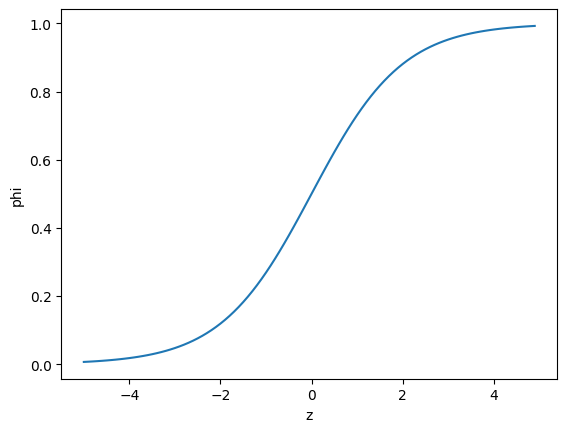

In [10]:
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [11]:
# 불리언 인덱싱
char_arr = np.array(['A','B','C','D','E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

##### 로지스틱 회귀(이진 분류)

In [12]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 2개의 종류만 뽑아냄
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [13]:
train_bream_smelt

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.9027693 ,  0.70314202,  0.88858491,  1.89027545,  0.85537174],
       [-1.0824759 , -1.61150165, -1.62162731, -1.7000674 , -1.92815631],
       [ 0.10337949,  0.04717013,  0.23714575,  0.88445197,  0.41799764],
       [ 1.49668216,  1.03112796,  1.21864741,  2.44274986,  1.40289707],
       [ 0.23004337,  0.23459067,  0.42823457,  1.3336029 ,  0.39983213],
       [-0.42579405, -0.29018684, -0.11028847,  0.65627104, -0.26107519],
       [ 1.28557569,  0.70314202,  0.89727076,  1.98228866,  1.06683526],
       [ 0.93373158,  0.60943175,  0.83646978,  1.85150445,  0.97832415],
       [ 0.80706771,  0.60943175,  0.81041221,  1.63137406,  1.0255057 ],
       [-1.07262426, -1.52716241, -1.5

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print("클래스 종류 : ", lr.classes_)
print("예측값 : ", lr.predict(train_bream_smelt[:5]))
print("클래스별 확률 : ", lr.predict_proba(train_bream_smelt[:5])) # Bream, Smelt의 확률

클래스 종류 :  ['Bream' 'Smelt']
예측값 :  ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
클래스별 확률 :  [[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [15]:
# 로지스틱 회귀 계수 확인
print(lr.coef_, lr.intercept_) # z = -0.404*무게 - 0.576*길이 -0.663*대각선 - 0.013*높이 -0.732*두께 - 2.161

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [16]:
# z값을 출력해줌
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z값을 이용해서 시그모이드를 거친 확률값을 보여줌
from scipy.special import expit
print(expit(decisions))

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


##### 로지스틱 회귀(다중 분류)

In [17]:
lr = LogisticRegression(C=20, max_iter = 1000) # 기본으로 L2노름 규제 적용, C : L2노름의 alpha값(C값이 올라갈수록 규제가 약해짐), max_iter : 반복 횟수(기본값이 100)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [18]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [19]:
print(lr.coef_.shape, lr.intercept_.shape) 
# 행 : 클래스
# 열 : 특성과 곱해지는 계수
# => 클래스마다 선형 함수가 만들어짐(7개)

(7, 5) (7,)


※ 다중 분류일 때는 시그모이드 말고 소프트맥스 함수 사용 ※
- 다중 분류는 클래스마다 z값을 1개씩 계산 -> 가장 높은 z값을 출력하는 클래스가 예측 클래스
- 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 만듦

$e_{sum} = e^{z1}+e^{z2}+e^{z3}+e^{z4}+e^{z5}+e^{z6}+e^{z7}\\
e^{z1}=\frac{e^{z1}}{e_{sum}}$

In [20]:
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals=2)

array([[ -6.51,   1.04,   5.17,  -2.76,   3.34,   0.35,  -0.63],
       [-10.88,   1.94,   4.78,  -2.42,   2.99,   7.84,  -4.25],
       [ -4.34,  -6.24,   3.17,   6.48,   2.36,   2.43,  -3.87],
       [ -0.69,   0.45,   2.64,  -1.21,   3.26,  -5.7 ,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.13,   3.5 ,  -0.09,  -0.7 ]])

In [21]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
np.round(proba, decimals=3) # lr.predict_proba()와 같음

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

### 확률적 경사 하강법 ⊂ 점진적 학습 알고리즘
데이터가 추가될 때 마다
- 이전에 훈련한 모델을 버리고 다시 새로운 모델을 훈련하는 방식(from scratch)
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서 조금씩 더 훈련(점진적 학습(온라인 학습))

※ 경사하강법을 쓸 때는 무조건 스케일 조정(standardscaler) ※

#### 점진적 학습 알고리즘의 대표 : 확률적 경사 하강법(훈련(최적화) 방법)
1. 훈련 세트에|서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 조금 내려감
2. 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감
3. 모든 샘플을 사용했을 때 다 내려가지 못하면 처음부터 시작
<hr/>

![](image/경사하강법.png)
- 에포크(epoch) : 훈련 세트를 한 번 모두 사용하는 과정
- 미니배치 경사 하강법 : 여러 개의 샘플을 사용해 경사 하강법을 수행(개수가 하이퍼파라미터, 2의 배수개)
- 배치 경사 하강법 : 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용


#### 손실함수 : 나쁜 정도를 측정하는 함수
- 손실 함수 : 샘플 하나에 대한 손실
- 비용 함수 : 흔련 세트에 있는 모든 샘플에 대한 손실 함수의 합(sum(손실 함수))

##### 로지스틱 손실 함수(이진 크로스엔트로피 손실 함수)
<table>
<thead><tr><td>예측</td><td>정답(타깃)</td></tr></thead>
<tbody>
    <tr>
        <td>0.9</td><td>1</td><td>-> -0.9</td>
    </tr>
    <tr>
        <td>0.3</td><td>1</td><td>-> -0.3</td>
    </tr>
    <tr>
        <td>0.8</td><td>1</td><td>-> -0.8</td>
    </tr><tr>
        <td>0.2</td><td>1</td><td>-> -0.2</td>
    </tr>
</tbody>
</table>

- 값이 낮을 수록 낮은 손실(-0.9, -0.8)
- 값이 클 수록 높은 손실(-0.3, -0.2)

=> -log를 취해서 보기 쉽게 만듦
- 타깃 = 1일때 
    - -log(예측 확률)
- 타깃 = 0일 때
    - -log(1 - 예측 확률)

#### 

#### SGDClassifier : 확률적 경사 하강법을 사용한 분류 모델

데이터 전처리

In [22]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [23]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42) # loss = 'log_loss' : 로지스틱 손실 함수 사용, max_iter : 에포크와 같음

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


c:\Users\cho03\Desktop\공부\MLDL\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [24]:
sc.partial_fit(train_scaled, train_target) # 더 훈련, 그냥 fit은 처음부터 다시

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


#### 에포크와 과대/과소적합
- 에포크 횟수가 적으면 훈련 세트를 덜 학습
- 에포크 횟수가 많으면 훈련 세트를 완전히 학습

=> 중간을 잘 찾기

In [25]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [26]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes) # classes : partial_fit 메서드는 찾아야 될 샘플의 클래스 개수를 모름 -> 직접 전달
    train_score.append(sc.score(train_scaled, train_target))    
    test_score.append(sc.score(test_scaled, test_target))

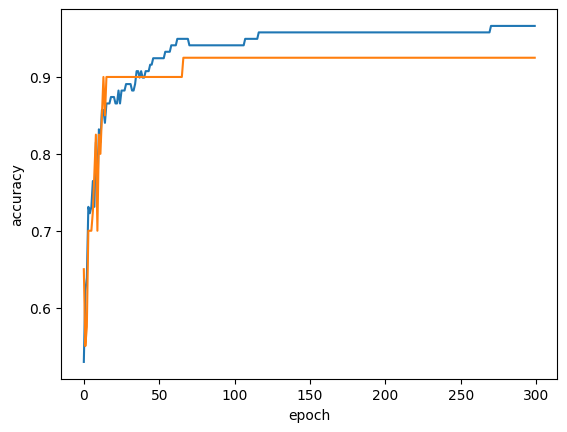

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [28]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state=42) # tol = None : 자동으로 멈추지 않고  max_iter만큼 무조건 반복
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=100, random_state=42, tol=None)

#### SVM : SGDClassifier의 loss 매개변수가 hinge 회귀일 경우

In [29]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
